In [1]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

# Load all the trained models
resnet_model = load_model('resnet50.h5')
efficientnet_model = load_model('efficientnet.h5')
mobilenet_model = load_model('mobilenetV2.h5')
densenet_model = load_model('densenet121.h5')
inception_model = load_model('inceptionV3.h5')
xception_model = load_model('xception.h5')
vgg16_model = load_model('vgg16.h5')

# Define class names
class_names = ['MonkeyPox', 'Other']

# Load and preprocess the test image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Resize the image to the input shape
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    return x



2024-10-13 11:43:54.847002: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-13 11:43:54.856604: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-13 11:43:54.868839: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-13 11:43:54.872128: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-13 11:43:54.880712: I tensorflow/core/platform/cpu_feature_guar

In [2]:
def ensemble_predict_majority_voting(image_path):
    x = preprocess_image(image_path)
    
    # Get predictions from each model (class predictions)
    resnet_pred = np.argmax(resnet_model.predict(x), axis=1)
    efficientnet_pred = np.argmax(efficientnet_model.predict(x), axis=1)
    mobilenet_pred = np.argmax(mobilenet_model.predict(x), axis=1)
    densenet_pred = np.argmax(densenet_model.predict(x), axis=1)
    inception_pred = np.argmax(inception_model.predict(x), axis=1)
    xception_pred = np.argmax(xception_model.predict(x), axis=1)
    vgg16_pred = np.argmax(vgg16_model.predict(x), axis=1)
    
    # Store all predictions
    predictions = [resnet_pred[0], efficientnet_pred[0], mobilenet_pred[0], 
                   densenet_pred[0], inception_pred[0], xception_pred[0], 
                   vgg16_pred[0]]
    
    # Perform majority voting
    final_prediction = np.bincount(predictions).argmax()
    
    class_name = class_names[final_prediction]
    
    return class_name

image_path = 'test/cat.jpg'  # Replace with your test image path

# Test the ensemble using majority voting on a sample image
predicted_class = ensemble_predict_majority_voting(image_path)
print(f'Predicted Class (Majority Voting): {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Predicted Class (Majority Voting): Other


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step


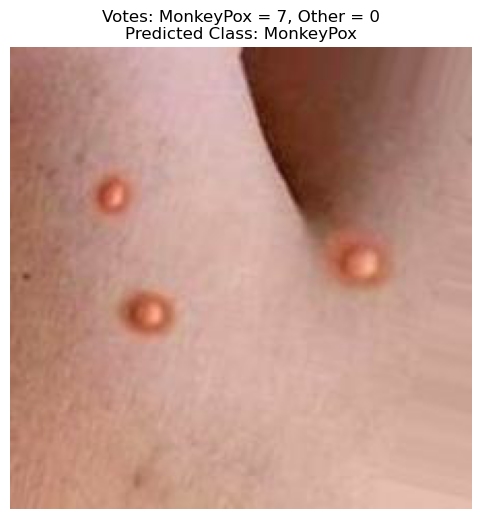

In [5]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt

# Load all the trained models
resnet_model = load_model('resnet50.h5')
efficientnet_model = load_model('efficientnet.h5')
mobilenet_model = load_model('mobilenetV2.h5')
densenet_model = load_model('densenet121.h5')
inception_model = load_model('inceptionV3.h5')
xception_model = load_model('xception.h5')
vgg16_model = load_model('vgg16.h5')

# Load and preprocess the test image
img_path = 'test/mp.jpg'  # Replace with your test image path
img = load_img(img_path, target_size=(224, 224))  # Ensure the size matches model input
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Perform predictions with each model
y_pred_resnet = np.argmax(resnet_model.predict(x), axis=1)[0]
y_pred_mobilenet = np.argmax(mobilenet_model.predict(x), axis=1)[0]
y_pred_efficientnet = np.argmax(efficientnet_model.predict(x), axis=1)[0]
y_pred_inception = np.argmax(inception_model.predict(x), axis=1)[0]
y_pred_xception = np.argmax(xception_model.predict(x), axis=1)[0]
y_pred_vgg = np.argmax(vgg16_model.predict(x), axis=1)[0]
y_pred_densenet = np.argmax(densenet_model.predict(x), axis=1)[0]

# Class names
class_names = ['MonkeyPox', 'Other']

# Collect the votes from each model
votes = [y_pred_resnet, y_pred_mobilenet, y_pred_efficientnet, 
         y_pred_inception, y_pred_xception, y_pred_vgg, y_pred_densenet]

# Count votes for each class
votes_monkeypox = votes.count(0)
votes_other = votes.count(1)

# Determine the majority class
if votes_monkeypox > votes_other:
    majority_class = 0  # 'MonkeyPox'
else:
    majority_class = 1  # 'Other'

predicted_class = class_names[majority_class]

# Display the number of votes for each class
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Votes: MonkeyPox = {votes_monkeypox}, Other = {votes_other}\nPredicted Class: {predicted_class}')
plt.axis('off')

# Show the image
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


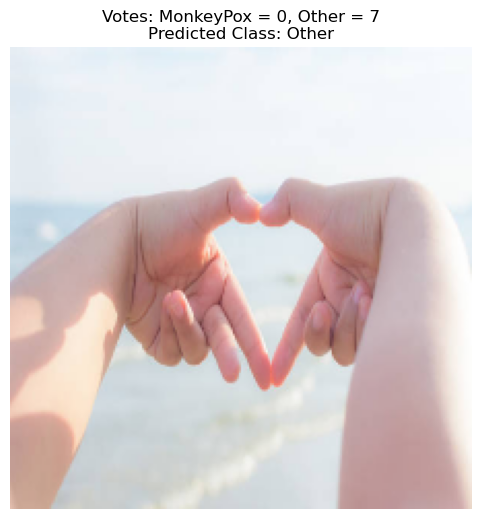

In [8]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt

# Load all the trained models
resnet_model = load_model('resnet50.h5')
efficientnet_model = load_model('efficientnet.h5')
mobilenet_model = load_model('mobilenetV2.h5')
densenet_model = load_model('densenet121.h5')
inception_model = load_model('inceptionV3.h5')
xception_model = load_model('xception.h5')
vgg16_model = load_model('vgg16.h5')

# Load and preprocess the test image
img_path = 'test/nonmp/normal104.png'  # Replace with your test image path
img = load_img(img_path, target_size=(224, 224))  # Ensure the size matches model input
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Perform predictions with each model
y_pred_resnet = np.argmax(resnet_model.predict(x), axis=1)[0]
y_pred_mobilenet = np.argmax(mobilenet_model.predict(x), axis=1)[0]
y_pred_efficientnet = np.argmax(efficientnet_model.predict(x), axis=1)[0]
y_pred_inception = np.argmax(inception_model.predict(x), axis=1)[0]
y_pred_xception = np.argmax(xception_model.predict(x), axis=1)[0]
y_pred_vgg = np.argmax(vgg16_model.predict(x), axis=1)[0]
y_pred_densenet = np.argmax(densenet_model.predict(x), axis=1)[0]

# Class names
class_names = ['MonkeyPox', 'Other']

# Collect the votes from each model
votes = [y_pred_resnet, y_pred_mobilenet, y_pred_efficientnet, 
         y_pred_inception, y_pred_xception, y_pred_vgg, y_pred_densenet]

# Count votes for each class
votes_monkeypox = votes.count(0)
votes_other = votes.count(1)

# Determine the majority class
if votes_monkeypox > votes_other:
    majority_class = 0  # 'MonkeyPox'
else:
    majority_class = 1  # 'Other'

predicted_class = class_names[majority_class]

# Display the number of votes for each class
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Votes: MonkeyPox = {votes_monkeypox}, Other = {votes_other}\nPredicted Class: {predicted_class}')
plt.axis('off')

# Show the image
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step


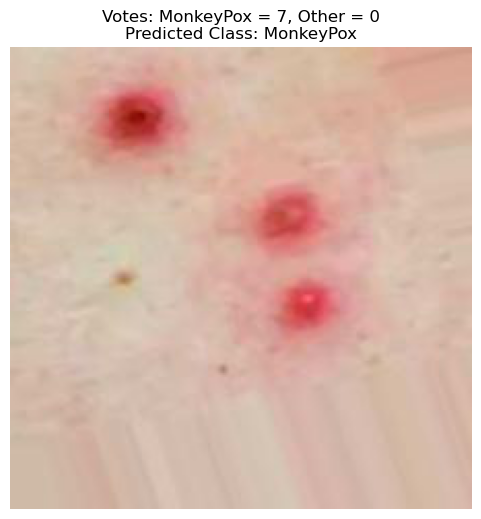

In [10]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt

# Load all the trained models
resnet_model = load_model('resnet50.h5')
efficientnet_model = load_model('efficientnet.h5')
mobilenet_model = load_model('mobilenetV2.h5')
densenet_model = load_model('densenet121.h5')
inception_model = load_model('inceptionV3.h5')
xception_model = load_model('xception.h5')
vgg16_model = load_model('vgg16.h5')

# Load and preprocess the test image
img_path = 'test/aug-_11_8948109.jpg'  # Replace with your test image path
img = load_img(img_path, target_size=(224, 224))  # Ensure the size matches model input
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Perform predictions with each model
y_pred_resnet = np.argmax(resnet_model.predict(x), axis=1)[0]
y_pred_mobilenet = np.argmax(mobilenet_model.predict(x), axis=1)[0]
y_pred_efficientnet = np.argmax(efficientnet_model.predict(x), axis=1)[0]
y_pred_inception = np.argmax(inception_model.predict(x), axis=1)[0]
y_pred_xception = np.argmax(xception_model.predict(x), axis=1)[0]
y_pred_vgg = np.argmax(vgg16_model.predict(x), axis=1)[0]
y_pred_densenet = np.argmax(densenet_model.predict(x), axis=1)[0]

# Class names
class_names = ['MonkeyPox', 'Other']

# Collect the votes from each model
votes = [y_pred_resnet, y_pred_mobilenet, y_pred_efficientnet, 
         y_pred_inception, y_pred_xception, y_pred_vgg, y_pred_densenet]

# Count votes for each class
votes_monkeypox = votes.count(0)
votes_other = votes.count(1)

# Determine the majority class
if votes_monkeypox > votes_other:
    majority_class = 0  # 'MonkeyPox'
else:
    majority_class = 1  # 'Other'

predicted_class = class_names[majority_class]

# Display the number of votes for each class
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Votes: MonkeyPox = {votes_monkeypox}, Other = {votes_other}\nPredicted Class: {predicted_class}')
plt.axis('off')

# Show the image
plt.show()


2025-04-12 02:41:21.388062: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-12 02:41:21.586255: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-12 02:41:21.656343: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-12 02:41:21.680623: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-12 02:41:21.828696: I tensorflow/core/platform/cpu_feature_guar

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step


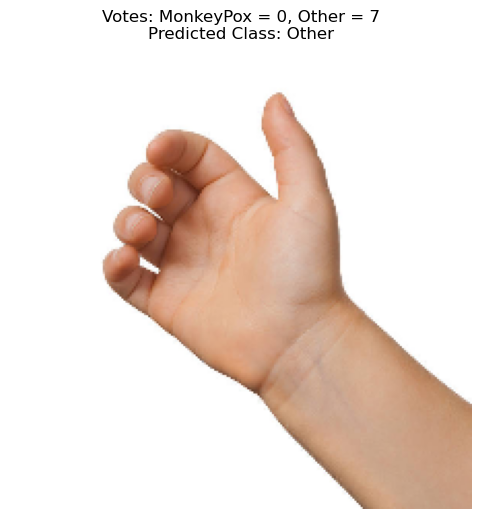

In [1]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt

# Load all the trained models
resnet_model = load_model('resnet50.h5')
efficientnet_model = load_model('efficientnet.h5')
mobilenet_model = load_model('mobilenetV2.h5')
densenet_model = load_model('densenet121.h5')
inception_model = load_model('inceptionV3.h5')
xception_model = load_model('xception.h5')
vgg16_model = load_model('vgg16.h5')

# Load and preprocess the test image
img_path = 'test/nonmp/normal89.png'  # Replace with your test image path
img = load_img(img_path, target_size=(224, 224))  # Ensure the size matches model input
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Perform predictions with each model
y_pred_resnet = np.argmax(resnet_model.predict(x), axis=1)[0]
y_pred_mobilenet = np.argmax(mobilenet_model.predict(x), axis=1)[0]
y_pred_efficientnet = np.argmax(efficientnet_model.predict(x), axis=1)[0]
y_pred_inception = np.argmax(inception_model.predict(x), axis=1)[0]
y_pred_xception = np.argmax(xception_model.predict(x), axis=1)[0]
y_pred_vgg = np.argmax(vgg16_model.predict(x), axis=1)[0]
y_pred_densenet = np.argmax(densenet_model.predict(x), axis=1)[0]

# Class names
class_names = ['MonkeyPox', 'Other']

# Collect the votes from each model
votes = [y_pred_resnet, y_pred_mobilenet, y_pred_efficientnet, 
         y_pred_inception, y_pred_xception, y_pred_vgg, y_pred_densenet]

# Count votes for each class
votes_monkeypox = votes.count(0)
votes_other = votes.count(1)

# Determine the majority class
if votes_monkeypox > votes_other:
    majority_class = 0  # 'MonkeyPox'
else:
    majority_class = 1  # 'Other'

predicted_class = class_names[majority_class]

# Display the number of votes for each class
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Votes: MonkeyPox = {votes_monkeypox}, Other = {votes_other}\nPredicted Class: {predicted_class}')
plt.axis('off')

# Show the image
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step


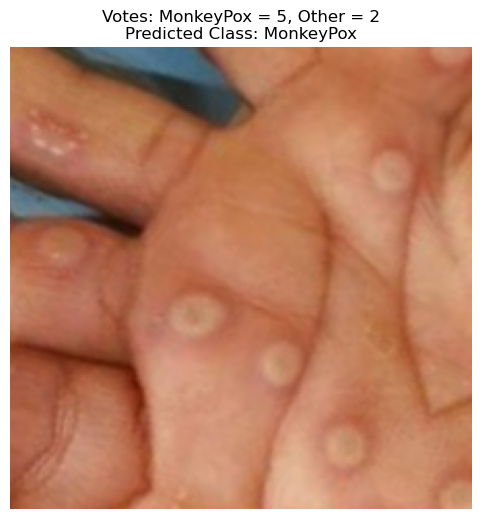

In [2]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt

# Load all the trained models
resnet_model = load_model('resnet50.h5')
efficientnet_model = load_model('efficientnet.h5')
mobilenet_model = load_model('mobilenetV2.h5')
densenet_model = load_model('densenet121.h5')
inception_model = load_model('inceptionV3.h5')
xception_model = load_model('xception.h5')
vgg16_model = load_model('vgg16.h5')

# Load and preprocess the test image
img_path = 'test/mp/mp1.jpg'  # Replace with your test image path
img = load_img(img_path, target_size=(224, 224))  # Ensure the size matches model input
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Perform predictions with each model
y_pred_resnet = np.argmax(resnet_model.predict(x), axis=1)[0]
y_pred_mobilenet = np.argmax(mobilenet_model.predict(x), axis=1)[0]
y_pred_efficientnet = np.argmax(efficientnet_model.predict(x), axis=1)[0]
y_pred_inception = np.argmax(inception_model.predict(x), axis=1)[0]
y_pred_xception = np.argmax(xception_model.predict(x), axis=1)[0]
y_pred_vgg = np.argmax(vgg16_model.predict(x), axis=1)[0]
y_pred_densenet = np.argmax(densenet_model.predict(x), axis=1)[0]

# Class names
class_names = ['MonkeyPox', 'Other']

# Collect the votes from each model
votes = [y_pred_resnet, y_pred_mobilenet, y_pred_efficientnet, 
         y_pred_inception, y_pred_xception, y_pred_vgg, y_pred_densenet]

# Count votes for each class
votes_monkeypox = votes.count(0)
votes_other = votes.count(1)

# Determine the majority class
if votes_monkeypox > votes_other:
    majority_class = 0  # 'MonkeyPox'
else:
    majority_class = 1  # 'Other'

predicted_class = class_names[majority_class]

# Display the number of votes for each class
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Votes: MonkeyPox = {votes_monkeypox}, Other = {votes_other}\nPredicted Class: {predicted_class}')
plt.axis('off')

# Show the image
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step


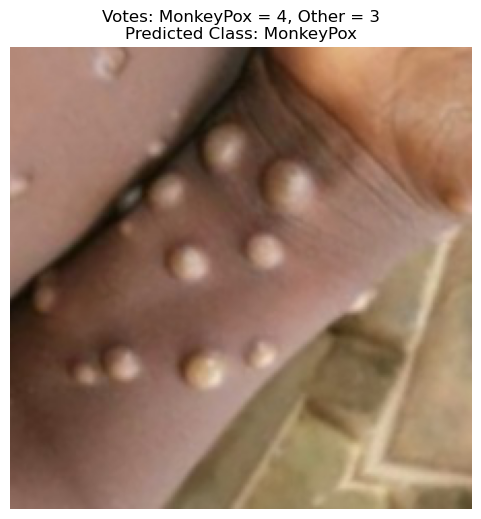

In [3]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt

# Load all the trained models
resnet_model = load_model('resnet50.h5')
efficientnet_model = load_model('efficientnet.h5')
mobilenet_model = load_model('mobilenetV2.h5')
densenet_model = load_model('densenet121.h5')
inception_model = load_model('inceptionV3.h5')
xception_model = load_model('xception.h5')
vgg16_model = load_model('vgg16.h5')

# Load and preprocess the test image
img_path = 'test/mp/mp2.jpg'  # Replace with your test image path
img = load_img(img_path, target_size=(224, 224))  # Ensure the size matches model input
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Perform predictions with each model
y_pred_resnet = np.argmax(resnet_model.predict(x), axis=1)[0]
y_pred_mobilenet = np.argmax(mobilenet_model.predict(x), axis=1)[0]
y_pred_efficientnet = np.argmax(efficientnet_model.predict(x), axis=1)[0]
y_pred_inception = np.argmax(inception_model.predict(x), axis=1)[0]
y_pred_xception = np.argmax(xception_model.predict(x), axis=1)[0]
y_pred_vgg = np.argmax(vgg16_model.predict(x), axis=1)[0]
y_pred_densenet = np.argmax(densenet_model.predict(x), axis=1)[0]

# Class names
class_names = ['MonkeyPox', 'Other']

# Collect the votes from each model
votes = [y_pred_resnet, y_pred_mobilenet, y_pred_efficientnet, 
         y_pred_inception, y_pred_xception, y_pred_vgg, y_pred_densenet]

# Count votes for each class
votes_monkeypox = votes.count(0)
votes_other = votes.count(1)

# Determine the majority class
if votes_monkeypox > votes_other:
    majority_class = 0  # 'MonkeyPox'
else:
    majority_class = 1  # 'Other'

predicted_class = class_names[majority_class]

# Display the number of votes for each class
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Votes: MonkeyPox = {votes_monkeypox}, Other = {votes_other}\nPredicted Class: {predicted_class}')
plt.axis('off')

# Show the image
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step


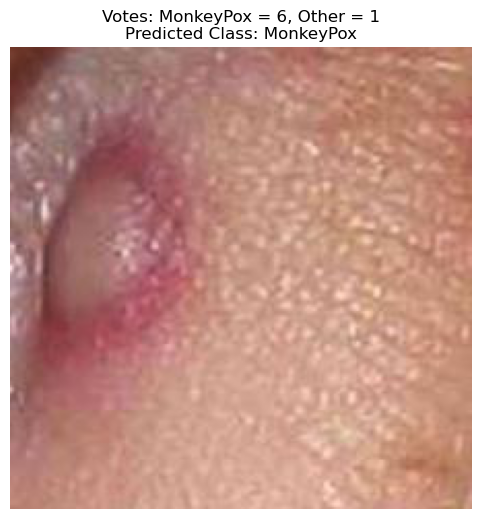

In [2]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt

# Load all the trained models
resnet_model = load_model('resnet50.h5')
efficientnet_model = load_model('efficientnet.h5')
mobilenet_model = load_model('mobilenetV2.h5')
densenet_model = load_model('densenet121.h5')
inception_model = load_model('inceptionV3.h5')
xception_model = load_model('xception.h5')
vgg16_model = load_model('vgg16.h5')

# Load and preprocess the test image
img_path = 'test/mp/mp3.jpg'  # Replace with your test image path
img = load_img(img_path, target_size=(224, 224))  # Ensure the size matches model input
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Perform predictions with each model
y_pred_resnet = np.argmax(resnet_model.predict(x), axis=1)[0]
y_pred_mobilenet = np.argmax(mobilenet_model.predict(x), axis=1)[0]
y_pred_efficientnet = np.argmax(efficientnet_model.predict(x), axis=1)[0]
y_pred_inception = np.argmax(inception_model.predict(x), axis=1)[0]
y_pred_xception = np.argmax(xception_model.predict(x), axis=1)[0]
y_pred_vgg = np.argmax(vgg16_model.predict(x), axis=1)[0]
y_pred_densenet = np.argmax(densenet_model.predict(x), axis=1)[0]

# Class names
class_names = ['MonkeyPox', 'Other']

# Collect the votes from each model
votes = [y_pred_resnet, y_pred_mobilenet, y_pred_efficientnet, 
         y_pred_inception, y_pred_xception, y_pred_vgg, y_pred_densenet]

# Count votes for each class
votes_monkeypox = votes.count(0)
votes_other = votes.count(1)

# Determine the majority class
if votes_monkeypox > votes_other:
    majority_class = 0  # 'MonkeyPox'
else:
    majority_class = 1  # 'Other'

predicted_class = class_names[majority_class]

# Display the number of votes for each class
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Votes: MonkeyPox = {votes_monkeypox}, Other = {votes_other}\nPredicted Class: {predicted_class}')
plt.axis('off')

# Show the image
plt.show()



--- Individual Model Predictions ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step
ResNet50: MonkeyPox
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
MobileNetV2: MonkeyPox
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 996ms/step
EfficientNetB0: MonkeyPox
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step
InceptionV3: Other
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
Xception: MonkeyPox
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
VGG16: MonkeyPox
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step
DenseNet121: MonkeyPox

--- Final Majority Voting Result ---
Votes for MonkeyPox: 6
Votes for Other: 1
Predicted Class by Majority Voting: MonkeyPox


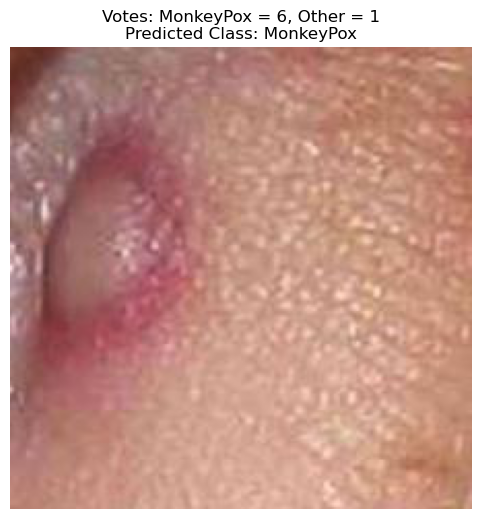

In [3]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt

# Load all the trained models
resnet_model = load_model('resnet50.h5')
efficientnet_model = load_model('efficientnet.h5')
mobilenet_model = load_model('mobilenetV2.h5')
densenet_model = load_model('densenet121.h5')
inception_model = load_model('inceptionV3.h5')
xception_model = load_model('xception.h5')
vgg16_model = load_model('vgg16.h5')

# Load and preprocess the test image
img_path = 'test/mp/mp3.jpg'  # Replace with your test image path
img = load_img(img_path, target_size=(224, 224))  # Ensure the size matches model input
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Class names
class_names = ['MonkeyPox', 'Other']

# Perform predictions with each model
models = {
    'ResNet50': resnet_model,
    'MobileNetV2': mobilenet_model,
    'EfficientNetB0': efficientnet_model,
    'InceptionV3': inception_model,
    'Xception': xception_model,
    'VGG16': vgg16_model,
    'DenseNet121': densenet_model
}

votes = []

print("\n--- Individual Model Predictions ---")
for model_name, model in models.items():
    y_pred = np.argmax(model.predict(x), axis=1)[0]
    votes.append(y_pred)
    print(f"{model_name}: {class_names[y_pred]}")

# Count votes for each class
votes_monkeypox = votes.count(0)
votes_other = votes.count(1)

# Determine the majority class
if votes_monkeypox > votes_other:
    majority_class = 0  # 'MonkeyPox'
else:
    majority_class = 1  # 'Other'

predicted_class = class_names[majority_class]

print("\n--- Final Majority Voting Result ---")
print(f"Votes for MonkeyPox: {votes_monkeypox}")
print(f"Votes for Other: {votes_other}")
print(f"Predicted Class by Majority Voting: {predicted_class}")

# Display the image with voting info
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Votes: MonkeyPox = {votes_monkeypox}, Other = {votes_other}\nPredicted Class: {predicted_class}')
plt.axis('off')
plt.show()



--- Individual Model Predictions ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
ResNet50: MonkeyPox
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
MobileNetV2: MonkeyPox
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step
EfficientNetB0: MonkeyPox
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
InceptionV3: Other
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
Xception: MonkeyPox
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
VGG16: MonkeyPox
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step
DenseNet121: Other

--- Final Majority Voting Result ---
Votes for MonkeyPox: 5
Votes for Other: 2
Predicted Class by Majority Voting: MonkeyPox


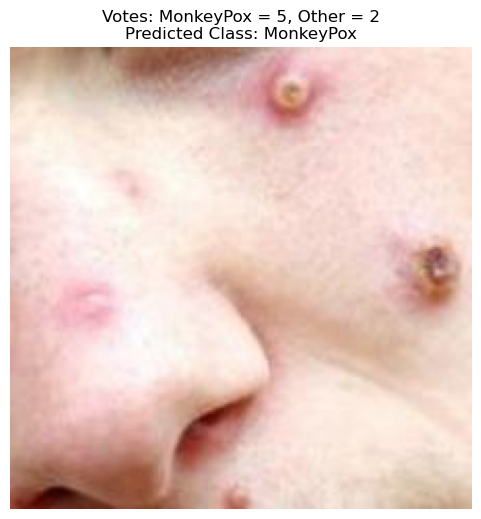

In [4]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt

# Load all the trained models
resnet_model = load_model('resnet50.h5')
efficientnet_model = load_model('efficientnet.h5')
mobilenet_model = load_model('mobilenetV2.h5')
densenet_model = load_model('densenet121.h5')
inception_model = load_model('inceptionV3.h5')
xception_model = load_model('xception.h5')
vgg16_model = load_model('vgg16.h5')

# Load and preprocess the test image
img_path = 'mkp_100.jpg'  # Replace with your test image path
img = load_img(img_path, target_size=(224, 224))  # Ensure the size matches model input
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Class names
class_names = ['MonkeyPox', 'Other']

# Perform predictions with each model
models = {
    'ResNet50': resnet_model,
    'MobileNetV2': mobilenet_model,
    'EfficientNetB0': efficientnet_model,
    'InceptionV3': inception_model,
    'Xception': xception_model,
    'VGG16': vgg16_model,
    'DenseNet121': densenet_model
}

votes = []

print("\n--- Individual Model Predictions ---")
for model_name, model in models.items():
    y_pred = np.argmax(model.predict(x), axis=1)[0]
    votes.append(y_pred)
    print(f"{model_name}: {class_names[y_pred]}")

# Count votes for each class
votes_monkeypox = votes.count(0)
votes_other = votes.count(1)

# Determine the majority class
if votes_monkeypox > votes_other:
    majority_class = 0  # 'MonkeyPox'
else:
    majority_class = 1  # 'Other'

predicted_class = class_names[majority_class]

print("\n--- Final Majority Voting Result ---")
print(f"Votes for MonkeyPox: {votes_monkeypox}")
print(f"Votes for Other: {votes_other}")
print(f"Predicted Class by Majority Voting: {predicted_class}")

# Display the image with voting info
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Votes: MonkeyPox = {votes_monkeypox}, Other = {votes_other}\nPredicted Class: {predicted_class}')
plt.axis('off')
plt.show()
